In [ ]:
#=======================
SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\rajkr\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:/Users/rajkr/OneDrive/Documents/svm.csv")
df


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [4]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
df.drop(df.columns[0],axis=1,inplace=True)
df.info()
df.drop(df.columns[23],axis=1,inplace=True)
df.info()
df.drop(df.columns[23],axis=1,inplace=True)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

<Axes: >

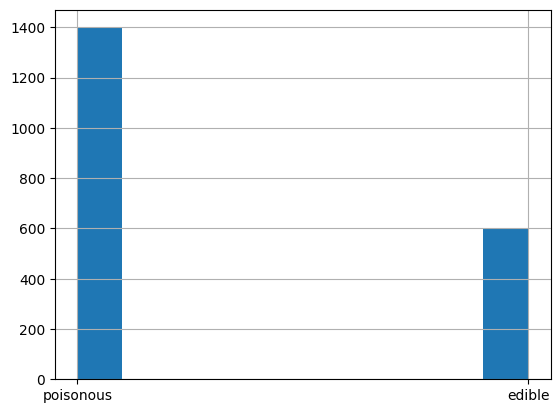

In [8]:
#visualisation
df['class'].hist()


In [9]:
t=df['class'].value_counts()
t


class
poisonous    1400
edible        600
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
for i in range(0,22):
    df.iloc[:,i]= LE.fit_transform(df.iloc[:,i])


In [11]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class
0,4,2,7,0,1,1,2,0,7,1,...,3,8,0,0,2,6,3,1,5,poisonous
1,4,0,6,0,1,3,1,1,3,0,...,2,0,1,0,2,6,1,2,5,edible
2,3,1,5,1,4,1,1,0,8,1,...,8,3,1,3,2,6,6,0,5,poisonous
3,0,2,4,1,3,3,0,0,6,0,...,8,5,0,3,2,0,4,1,0,poisonous
4,3,3,8,1,5,2,1,1,6,0,...,3,7,1,2,0,4,8,1,4,poisonous


In [12]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['class']=LE.fit_transform(df['class'])
Y=df['class']
Y


0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 2000 non-null   object
 1   cap_surface               2000 non-null   object
 2   cap_color                 2000 non-null   object
 3   bruises                   2000 non-null   object
 4   odor                      2000 non-null   object
 5   gill_attachment           2000 non-null   object
 6   gill_spacing              2000 non-null   object
 7   gill_size                 2000 non-null   object
 8   gill_color                2000 non-null   object
 9   stalk_shape               2000 non-null   object
 10  stalk_root                2000 non-null   object
 11  stalk_surface_above_ring  2000 non-null   object
 12  stalk_surface_below_ring  2000 non-null   object
 13  stalk_color_above_ring    2000 non-null   object
 14  stalk_color_below_ring  

<Axes: >

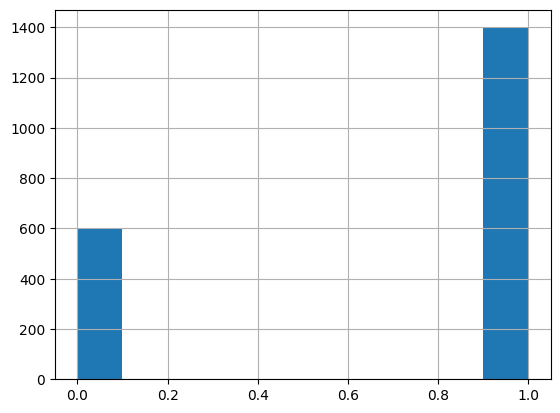

In [14]:
#visualisation
df['class'].hist()


In [15]:
t=df['class'].value_counts()
t


class
1    1400
0     600
Name: count, dtype: int64

<Axes: >

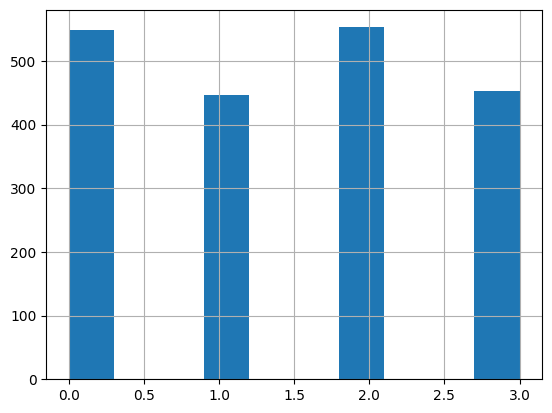

In [16]:
df['veil_color'].hist()


<Axes: >

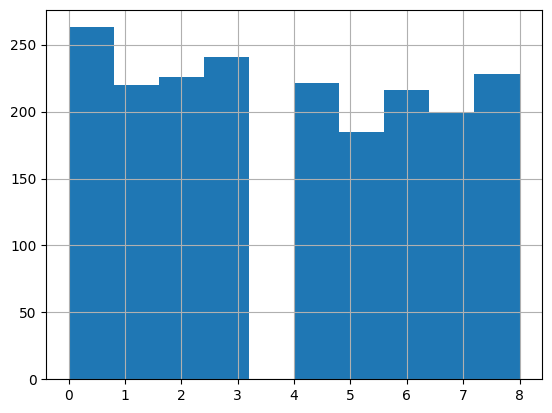

In [17]:
df['cap_color'].hist()


<Axes: >

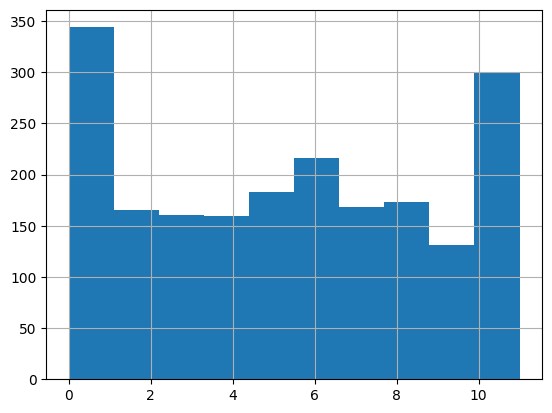

In [18]:
df['gill_color'].hist()


<Axes: >

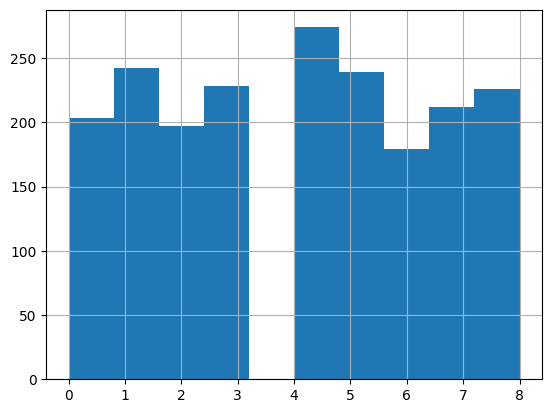

In [19]:

df['odor'].hist()


<Axes: >

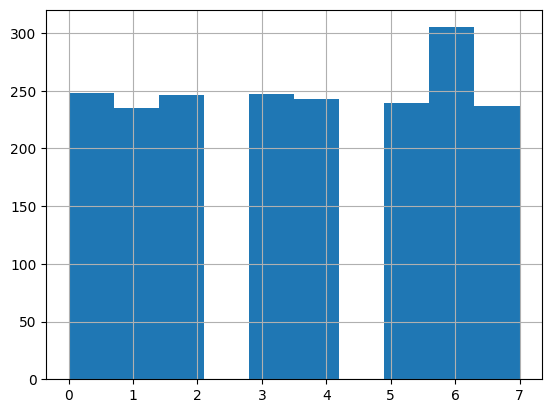

In [20]:
df['ring_type'].hist()


<Axes: >

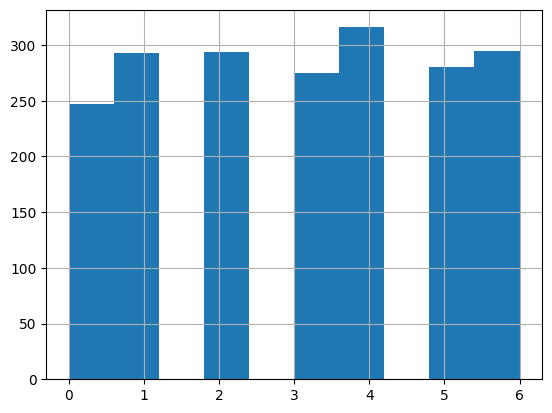

In [21]:
df['habitat'].hist()


In [ ]:
#bar plot


<Axes: xlabel='veil_color'>

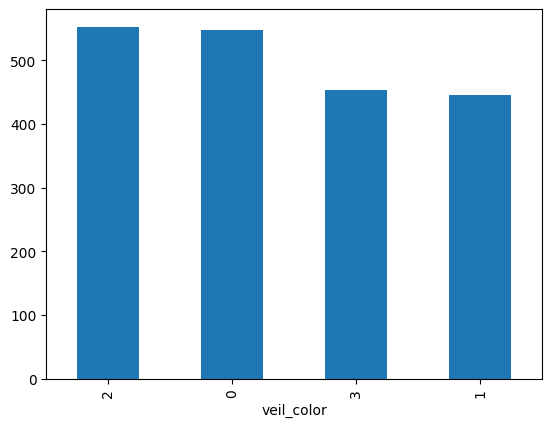

In [22]:
t1=df['veil_color'].value_counts()
t1
t1.plot(kind='bar')


<Axes: xlabel='cap_color'>

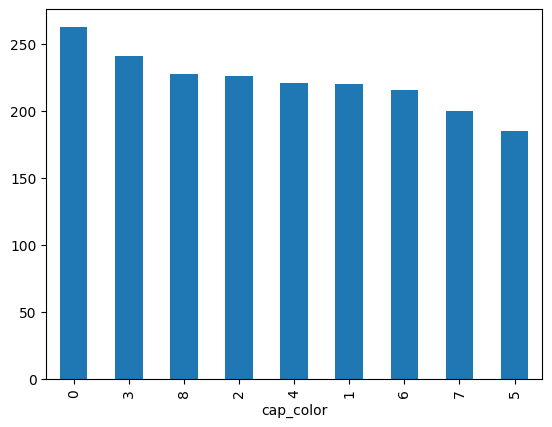

In [23]:
t2=df['cap_color'].value_counts()
t2
t2.plot(kind='bar')


<Axes: xlabel='gill_color'>

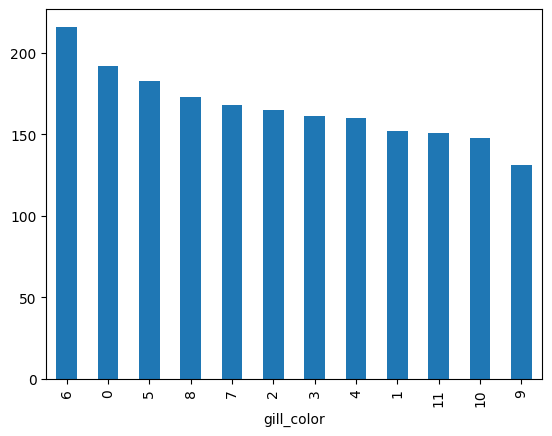

In [25]:
t3=df['gill_color'].value_counts()
t3
t3.plot(kind='bar')

<Axes: xlabel='habitat'>

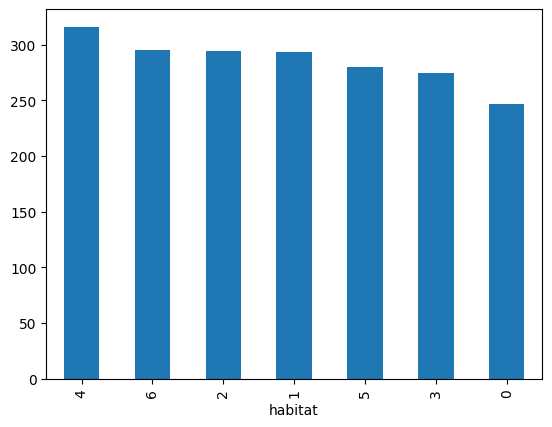

In [26]:
t6=df['habitat'].value_counts()
t6
t6.plot(kind='bar')


In [ ]:
#scatter plot

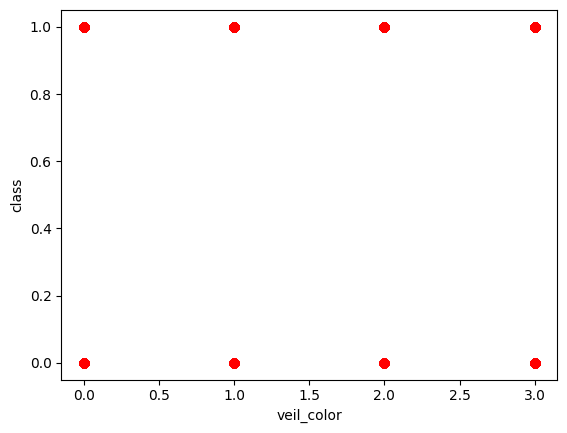

In [27]:
plt.scatter(x=df['veil_color'],y=df['class'],color='red')
plt.xlabel('veil_color')
plt.ylabel('class')
plt.show()


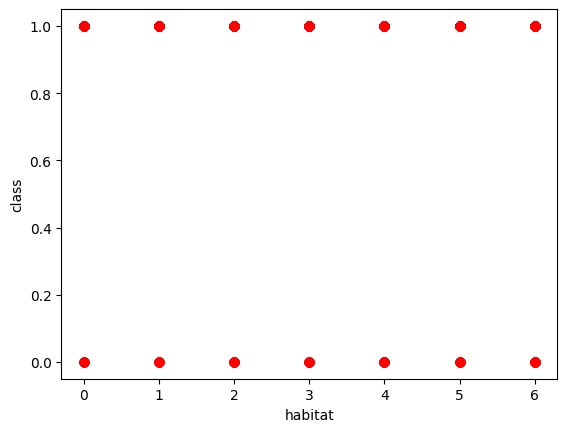

In [28]:
plt.scatter(x=df['habitat'],y=df['class'],color='red')
plt.xlabel('habitat')
plt.ylabel('class')
plt.show()


In [ ]:
#boxplot


<Axes: ylabel='class'>

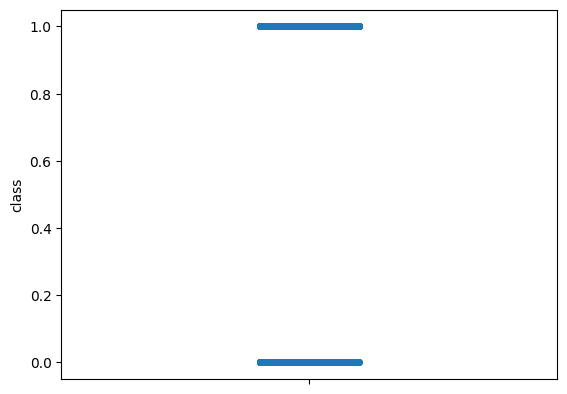

In [29]:
sns.stripplot(y='class',data=df)


<Axes: ylabel='habitat'>

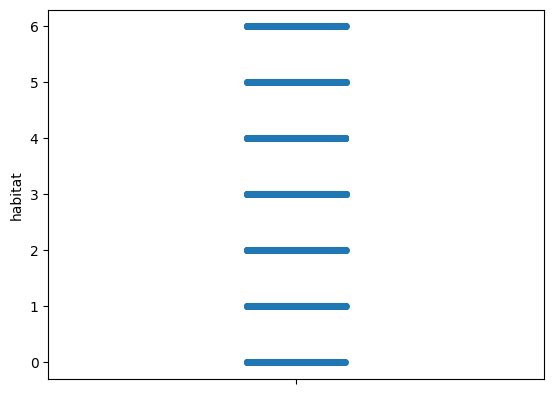

In [30]:
sns.stripplot(y='habitat',data=df)


<Axes: ylabel='gill_color'>

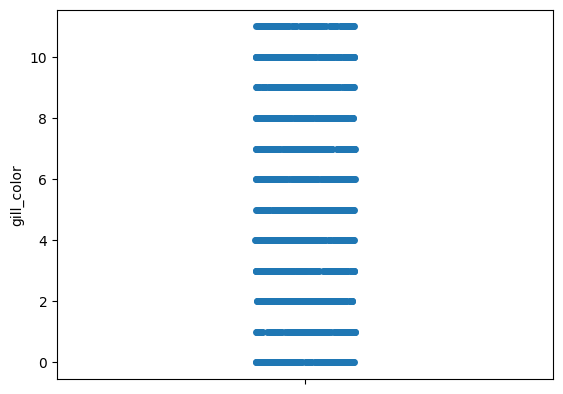

In [31]:
sns.stripplot(y='gill_color',data=df)


In [32]:
#split
X=df.iloc[:,0:22]
X
Y=df['class']
Y


0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [33]:
#data partition
from sklearn.model_selection._split import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10)
len(X_train)
len(X_test)


500

In [34]:
#model fitting
from sklearn.svm import SVC
clf=SVC(kernel='linear',C=1.0)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)



In [35]:
from sklearn.metrics import accuracy_score
print('trainingAccuracy:',accuracy_score(y_train,y_pred_train).round(2))
print('testAccuracy:',accuracy_score(y_train,y_pred_train).round(2))


trainingAccuracy: 0.71
testAccuracy: 0.71


In [36]:
from sklearn.svm import SVC
clf=SVC(kernel='poly',degree=2)
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score
print('trainingAccuracy:',accuracy_score(y_train,y_pred_train).round(2))
print('testAccuracy:',accuracy_score(y_train,y_pred_train).round(2))


trainingAccuracy: 0.71
testAccuracy: 0.71


In [38]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',gamma='scale')
clf.fit(X_train,y_train)
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score
print('trainingAccuracy:',accuracy_score(y_train,y_pred_train).round(2))
print('testAccuracy:',accuracy_score(y_train,y_pred_train).round(2))


trainingAccuracy: 0.73
testAccuracy: 0.73


In [40]:
from sklearn.metrics import confusion_matrix
y_pred =clf.predict(X_test)
clf=confusion_matrix(y_test,y_pred)
clf


array([[  8, 154],
       [  0, 338]], dtype=int64)

Text(58.222222222222214, 0.5, 'truth')

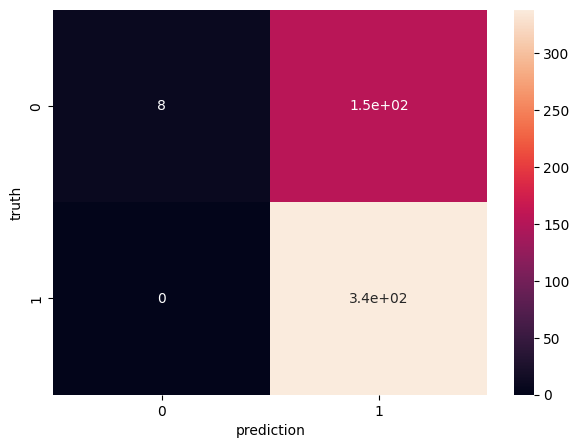

In [41]:
#plot
plt.figure(figsize=(7,5))
sns.heatmap(clf,annot=True)
plt.xlabel('prediction')
plt.ylabel('truth')


In [42]:
#classification
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.05      0.09       162
           1       0.69      1.00      0.81       338

    accuracy                           0.69       500
   macro avg       0.84      0.52      0.45       500
weighted avg       0.79      0.69      0.58       500

